# Philadelphia Housing Analysis Project

## Introduction

Permits are required in most jurisdictions whenever developers or homeowners want to alter or remodel their homes, construct new buildings, and/or demolish existing structures.  The type of permit required depends on both the local jurisdiction and the scope of work performed. In Philadelphia, Pennsylvania, permits are issued by The Department of Licenses & Inspections and the data for those permits are publicly available at https://www.opendataphilly.org/.  For this analysis, two files downloaded from [the Licenses and Inspections Building and Zoning Permits page](https://www.opendataphilly.org/dataset/licenses-and-inspections-building-permits) of this website will be used, listing information for permits from 2007 to the present.  

The other data to be utilized in this analysis will be housing price data made available by Zillow at https://www.zillow.com/research/data/.  The data from Zillow is based on the Zillow Home Value Index (ZHVI) when represents the “typical home value for the region” as defined in Zillow's [methodology guide](https://www.zillow.com/research/zhvi-methodology-2019-highlights-26221/).  

The goal of this analysis is to determine whether the number of permits issued in a given zip code within a given year is correlated to property value and changes of property values within the zip code.  The assumption going in is that building permits that better the buildings within a zip code should have some correlation with the future housing prices and change in housing prices.

The limitations for this analysis include the following:
- The permit data available ranges back from 2007, which only gives 15 years of analysis.  
- The housing market crash of 2008 occured during the short timeframe available within our data.  This crash would be assumed to have affected housing price data and may overshadow any correlations between housing prices and permit issuance. 
- Not all renovation work on a building requires a permit, which would limit the data available within our permit dataset.  In addition, some work is occasionally performed without proper permitting, which would again limit data available in our dataset.

With all of that understood, we can begin exploring the data and performing the analysis. 

## Data Prep

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

### Zillow Data

First we'll read the Zillow Home Data into a DataFrame.

In [2]:
zillow = pd.read_csv('data_files/ZillowHomeValues.csv')
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329164.0,334102.0,338063.0,346702.0,354503.0,361964.0,369817.0,376161.0,381722.0,386636.0,394205.0,402739.0,412059.0,420596.0,429298.0,436348.0,442197.0,447713.0,452784.0,457515.0,461080.0,465719.0,469872.0,475329.0,478975.0,482527.0,484545.0,488323.0,493191.0,499230.0,503783.0,507998.0,511134.0,514347.0,518319.0,522555.0,527420.0,531353.0,535386.0,539419.0,549521.0,NaN,NaN,NaN,613322.0,617190.0,619629.0,625469.0,631337.0,636172.0,639825.0,643390.0,647277.0,652399.0,660047.0,669929.0,684061.0,696896.0,708835.0,716890.0,728938.0,739607.0,759498.0,771672.0,786081.0,795663.0,805169.0,814693.0,817139.0,832872.0,851044.0,876625.0,902028.0,921298.0,927990.0,922371.0,924596.0,931732.0,934267.0,909405.0,874217.0,840322.0,841363.0,864142.0,878202.0,881070.0,875319.0,881363.0,884951.0,877356.0,873008.0,865182.0,888335.0,909176.0,932812.0,932759.0,933902.0,929

Next we'll remove any of the rows with locations that are not Philadelphia, Pennsylvania

In [3]:
# Remove data not in Philadelphia, Pennsylvania
zillow = zillow[(zillow['City'] == 'Philadelphia') & (zillow['State'] == 'PA')]
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
125,65810,126,19143,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,60701.0,61009.0,61132.0,61497.0,62089.0,62804.0,63377.0,63925.0,64313.0,64609.0,64756.0,65187.0,65676.0,65861.0,65823.0,66081.0,66273.0,66797.0,67099.0,67641.0,67686.0,67959.0,68203.0,68695.0,68447.0,68180.0,67802.0,67913.0,68143.0,68498.0,68586.0,68493.0,68414.0,68426.0,68588.0,68758.0,69396.0,70405.0,71333.0,72108.0,71545.0,70832.0,69969.0,69189.0,68933.0,68952.0,69436.0,69497.0,69166.0,68806.0,68433.0,67859.0,68503.0,69640.0,72312.0,74534.0,76922.0,77949.0,78439.0,78686.0,79661.0,81557.0,83961.0,86307.0,88384.0,90337.0,92085.0,93843.0,95070.0,96082.0,96754.0,97226.0,97366.0,97250.0,97431.0,98005.0,98827.0,99968.0,101264.0,102415.0,102880.0,103031.0,103011.0,103479.0,104487.0,105486.0,106479.0,107086.0,107907.0,108633.0,109295.0,109709.0,109799.0,110175.0,110832.0,111722.0,111804.0,112139.0,111773.0,111921.0,111393.0,111219.0,110379

To account for any errors in data entry for the city and state, we'll also check the zipcodes column.  We'll remove any rows with zipcodes not within the list of valid Philadelphia, PA zipcodes.  A list of zipcodes within Philadelphia, PA was obtained from https://www.zillow.com/browse/homes/pa/philadelphia-county/ and is replicated below.

In [4]:
# List of zipcodes from: https://www.zillow.com/browse/homes/pa/philadelphia-county/
list_of_zipcodes = [
    '19120','19124','19111','19143','19134','19149','19148','19104','19140','19145',
    '19139','19131','19144','19146','19147','19128','19135','19115','19141','19136',
    '19154','19152','19151','19116','19121','19132','19114','19138','19142','19119',
    '19125','19133','19130','19150','19103','19122','19126','19123','19107','19153',
    '19106','19129','19118','19137','19102','19127','19019','19093','19092','19101',
    '19099','19105','19109','19108','19110','19112','19160','19155','19162','19161',
    '19171','19170','19173','19172','19176','19175','19178','19177','19181','19179',
    '19183','19182','19185','19184','19188','19187','19192','19191','19194','19193',
    '19196','19195','19244','19197','19255','19190']

Only keep rows from data with a zipcode within the list above.

In [5]:
# rename RegionName columns and cast as strings
zillow.rename(columns={'RegionName': 'zipcode'}, inplace=True)
zillow['zipcode'] = zillow['zipcode'].astype('str')
zillow = zillow[zillow['zipcode'].isin(list_of_zipcodes)]
zillow.head()

,RegionID,SizeRank,zipcode,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
125,65810,126,19143,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,60701.0,61009.0,61132.0,61497.0,62089.0,62804.0,63377.0,63925.0,64313.0,64609.0,64756.0,65187.0,65676.0,65861.0,65823.0,66081.0,66273.0,66797.0,67099.0,67641.0,67686.0,67959.0,68203.0,68695.0,68447.0,68180.0,67802.0,67913.0,68143.0,68498.0,68586.0,68493.0,68414.0,68426.0,68588.0,68758.0,69396.0,70405.0,71333.0,72108.0,71545.0,70832.0,69969.0,69189.0,68933.0,68952.0,69436.0,69497.0,69166.0,68806.0,68433.0,67859.0,68503.0,69640.0,72312.0,74534.0,76922.0,77949.0,78439.0,78686.0,79661.0,81557.0,83961.0,86307.0,88384.0,90337.0,92085.0,93843.0,95070.0,96082.0,96754.0,97226.0,97366.0,97250.0,97431.0,98005.0,98827.0,99968.0,101264.0,102415.0,102880.0,103031.0,103011.0,103479.0,104487.0,105486.0,106479.0,107086.0,107907.0,108633.0,109295.0,109709.0,109799.0,110175.0,110832.0,111722.0,111804.0,112139.0,111773.0,111921.0,111393.0,111219.0,110379.0,

We're only going to look at house values year over year rather than each month in order to smooth out fluctuations like seasonal changes, etc. that affect number of permits (due to weather constraints) and housing values.  We're interested in year-over-year changes within this analysis, not seasonal ones, so we'll need to simplify the columns in the data by taking the mean of the 12 months of the year.  We're also dropping the year 2022 from the data since the year is ongoing and thus it would be partial data.

We'll keep those yearly housing value columns along with the 'zipcode' column, and drop all others as they're not relevant to this analysis.

In [6]:
groupby_dict = {}
year_list = [str(x) for x in range(2000,2022)]
for col in zillow.columns:
    for year in year_list:
        if year in col:
            groupby_dict[col] = year
groupby_dict['zipcode'] = 'zipcode'

zillow = zillow.groupby(groupby_dict, axis = 1).mean()
zillow.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,zipcode
125,62949.916667,66982.833333,68354.000000,70132.916667,72604.083333,90105.583333,100410.583333,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333,19143.0
247,87169.083333,92798.916667,100774.250000,113989.916667,133582.583333,163733.583333,182845.916667,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000,19111.0
338,48307.250000,50625.833333,53024.750000,58146.000000,65528.666667,78466.916667,91452.750000,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000,19124.0
423,60626.583333,62999.750000,65052.333333,69190.500000,76995.750000,89394.583333,102700.916667,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333,19120.0
509,74463.083333,68886.833333,58794.000000,70255.250000,91643.750000,114452.250000,118049.916667,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667,19104.0


We're going to alter the DataFrame so that the only columns are 'zipcode', 'year', and 'hv (housing value).  This will allow us to compute percent changes for previous years and will help us to merge this data with the permit data.

In [7]:
zillow = zillow.melt(id_vars=["zipcode"], var_name="year", value_name="hv")
zillow['zipcode'] = zillow['zipcode'].astype('int').astype('str')
zillow['year'] = zillow['year'].astype(int)
zillow.head()

,zipcode,year,hv
0,19143,2000,62949.916667
1,19111,2000,87169.083333
2,19124,2000,48307.250000
3,19120,2000,60626.583333
4,19104,2000,74463.083333


Now we'll create the columns showing house values (`hv_`) from previous years (1, 3, and 5 years ago) along with columns showing the percent change (`pc_`) from previous years (1, 3, and 5 years ago) along each zipcode in a given year.

In [8]:
## First define a groupby function:
def prev_prices(data):
    data = data.sort_values("year", ascending=True)
    
    # housing values 1 year, 3 years, and 5 years prior
    data["hv_1y"] = data["hv"].shift(1)
    data["hv_3y"] = data["hv"].shift(3)
    data["hv_5y"] = data["hv"].shift(5)
    
    # percent change since 1 year, 3 years, and 5 years prior
    data["pc_1y"] = (data["hv"] - data["hv_1y"]) / data["hv_1y"] * 100
    data["pc_3y"] = (data["hv"] - data["hv_3y"]) / data["hv_3y"] * 100
    data["pc_5y"] = (data["hv"] - data["hv_5y"]) / data["hv_5y"] * 100

    return data

## Groupby and apply
zillow = zillow.groupby(["zipcode"]).apply(prev_prices)

Let's examine the data for a given zipcode to ensure the above code resulted in the expected output:

In [9]:
# Check table on a given zipcode
zillow[zillow['zipcode'] == '19125']

,zipcode,year,hv,hv_1y,hv_3y,hv_5y,pc_1y,pc_3y,pc_5y
31,19125,2000,59695.500000,NaN,NaN,NaN,NaN,NaN,NaN
77,19125,2001,61592.833333,59695.500000,NaN,NaN,3.178352,NaN,NaN
123,19125,2002,66578.083333,61592.833333,NaN,NaN,8.093880,NaN,NaN
169,19125,2003,80227.833333,66578.083333,59695.500000,NaN,20.501867,34.395111,NaN
215,19125,2004,100972.250000,80227.833333,61592.833333,NaN,25.856883,63.935063,NaN
261,19125,2005,141262.500000,100972.250000,66578.083333,59695.500000,39.902300,112.175678,136.638440
307,19125,2006,189545.500000,141262.500000,80227.833333,61592.833333,34.179630,136.259029,207.739537
353,19125,2007,204270.416667,189545.500000,100972.250000,66578.083333,7.768539,102.303521,206.813303
399,19125,2008,208613.000000,204270.416667,141262.500000,80227.833333,2.125899,47.677551,160.025718
445,19125,2009,204203.833333,208613.000000,189545.500000,100972.250000,-2.113563,7.733411,102.237578


The 'hv_' columns can be dropped as they won't be relevant to our analysis and were only used to compute the percent change columns.

In [10]:
zillow = zillow[['zipcode', 'year', 'hv', 'pc_1y', 'pc_3y', 'pc_5y']]

### Permit Data

Now we'll load in the permit data, starting with `permits_2007-2015.csv` has permit data from 2007-2015.

In [11]:
#dtypes specified due to errors
permits1 = pd.read_csv('data_files/permits_2007-2015.csv', dtype={'permitnumber':str, 'parcel_id_num':str})
permits1.head()

,objectid,permitnumber,addressobjectid,parcel_id_num,permittype,permitdescription,commercialorresidential,typeofwork,approvedscopeofwork,permitissuedate,status,applicanttype,contractorname,contractoraddress1,contractoraddress2,contractorcity,contractorstate,contractorzip,mostrecentinsp,opa_account_num,address,unit_type,unit_num,zip,censustract,council_district,opa_owner,systemofrecord,geocode_x,geocode_y,posse_jobid,lat,lng
0,32,100754,8402,336710,L_FFORM,FAST FORM BUILDING PERMIT,NaN,NaN,NaN,2007-09-04 16:41:02,COMPLETED,APPL,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-29 15:20:00,632172000.0,126 ALEXIS LN,NaN,NaN,19115-3402,344.0,10.0,CHEN ZHI QIANG ZHENG FANG,HANSEN,2.720980e+06,290557.097420,NaN,40.099475,-75.059753
1,2,100029,740935,534979,BP_ADMINST,ADMINISTRATIVE PERMIT,NaN,CO,CERTIFICATE OF OCCUPANCY,2007-08-30 16:37:33,COMPLETED,OWNER,J J DELUCA CO INC,"760 W SPROUL ROAD, STE 300",NaN,SPRINGFIELD,PA,19064-4001,2007-09-28 18:20:00,888112914.0,815-37 ARCH ST,NaN,621,19107-2403,2.0,1.0,CHIANG MAGGIE,HANSEN,2.696151e+06,236716.444730,NaN,39.953782,-75.154127
2,1017,240571,360472,132411,ZP_USE,USE PERMIT,NaN,SFRED,CREATE MOTHER IN LAW SUITE IN BASEMENT OF SFD.,2009-10-02 14:42:21,COMPLETED,OWNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,652264500.0,8759 JACKSON ST,NaN,NaN,19136-2141,349.0,6.0,KAMDAR PRAPTI M KAMDAR MEHUL PANKAJ,HANSEN,2.735362e+06,271794.924559,NaN,40.046782,-75.010448
3,13,100212,17535,111870,PP_PLUMBNG,PLUMBING PERMIT,NaN,EZPLUM,"AREA DRAIN, BASEMENT: LT, WC, LAV, HWH, 1ST FL...",2007-08-31 13:56:52,COMPLETED,CONTRACTOR,ANTHONY S. RACHUBA JR,1660 FOULKROD STREET,NaN,PHILADELPHIA,PA,19124-,2008-05-20 13:32:00,361021600.0,1909 ANNIN ST,NaN,NaN,19146-2907,21.0,2.0,GORDON JESSICA L,HANSEN,2.690311e+06,230662.085428,NaN,39.937639,-75.175576
4,43,100984,419501,188921,L_FFORM,FAST FORM BUILDING PERMIT,NaN,NaN,NaN,2007-09-05 16:24:13,COMPLETED,APPL,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-17 15:45:00,291108000.0,2632 MASTER ST,NaN,NaN,19121-0000,138.0,5.0,MOSHER JENNIFER LYNN LANGHAM MICHAEL CHARLES,HANSEN,2.688834e+06,244955.524768,NaN,39.976977,-75.179360


The relevant columnns in the data for this analysis would be the following:
- Zipcode of Proposed Work ('zip' column)
- Permit Description ('permitdescription' column)
- Permit Issue Date ('permitissuedate' column)

Let's isolate those columns, load in the other csv file (`permits_2016-2022.csv`), and combine the two DataFrames into one.

In [12]:
# Load the other csv file
col_list = ['zip', 'permitdescription', 'permitissuedate']
permits1 = permits1[col_list]
permits2 = pd.read_csv('data_files/permits_2016-2022.csv', usecols=col_list)

# Combine
permits_combined = permits = pd.concat([permits1, permits2], ignore_index = True)

permits_combined.head()

,zip,permitdescription,permitissuedate
0,19115-3402,FAST FORM BUILDING PERMIT,2007-09-04 16:41:02
1,19107-2403,ADMINISTRATIVE PERMIT,2007-08-30 16:37:33
2,19136-2141,USE PERMIT,2009-10-02 14:42:21
3,19146-2907,PLUMBING PERMIT,2007-08-31 13:56:52
4,19121-0000,FAST FORM BUILDING PERMIT,2007-09-05 16:24:13


To match the Zillow data, The 'zip' column should be renamed to 'zipcode' and we should extract the year from the 'permitissuedate' columnn.  We'll also check zipcodes and remove any rows with zipcodes not in the list that was included above and used to process the Zillow data. 

In [13]:
# Remove trailing digits of zipcode and remove rows with invalid zipcodes
permits_combined['zipcode'] = permits['zip'].str.split('-', expand=True)[0]
permits_combined = permits_combined[permits_combined['zipcode'].isin(list_of_zipcodes)]

# Extract year from 'permitissuedate'
permits_combined['permitissuedate'] = pd.to_datetime(permits_combined['permitissuedate'])
permits_combined['year'] = pd.DatetimeIndex(permits_combined['permitissuedate']).year

# Select our new columns along with the 'permitdescription' column
permits_combined = permits_combined[['zipcode', 'year', 'permitdescription']]
permits_combined.head()

,zipcode,year,permitdescription
0,19115,2007,FAST FORM BUILDING PERMIT
1,19107,2007,ADMINISTRATIVE PERMIT
2,19136,2009,USE PERMIT
3,19146,2007,PLUMBING PERMIT
4,19121,2007,FAST FORM BUILDING PERMIT


## Data Analysis

### Setup

Let's look at our two dataframes:

In [14]:
zillow.head()

,zipcode,year,hv,pc_1y,pc_3y,pc_5y
0,19143,2000,62949.916667,NaN,NaN,NaN
1,19111,2000,87169.083333,NaN,NaN,NaN
2,19124,2000,48307.250000,NaN,NaN,NaN
3,19120,2000,60626.583333,NaN,NaN,NaN
4,19104,2000,74463.083333,NaN,NaN,NaN


In [15]:
permits_combined.head()

,zipcode,year,permitdescription
0,19115,2007,FAST FORM BUILDING PERMIT
1,19107,2007,ADMINISTRATIVE PERMIT
2,19136,2009,USE PERMIT
3,19146,2007,PLUMBING PERMIT
4,19121,2007,FAST FORM BUILDING PERMIT


Before combining these dataframes, we'll be calculating the number of permits grouped by both zipcode and year.  However, which permit types to include is still a question.  Let's take a look at the `permitdescription` column.

In [16]:
permits_combined['permitdescription'].value_counts()

PLUMBING PERMIT                 188644
ELECTRICAL PERMIT               133307
ALTERATION PERMIT               100285
MECHANICAL PERMIT                46057
ZONING PERMIT                    37286
ZONING/USE PERMIT                34460
USE PERMIT                       28678
SUPPRESSION PERMIT               23926
ADMINISTRATIVE PERMIT            22940
RESIDENTIAL BUILDING PERMIT      18053
DEMOLITION PERMIT                15726
MECHANICAL / FUEL GAS PERMIT     14935
NEW CONSTRUCTION PERMIT          14443
GENERAL PERMIT MINOR             10883
COMMERCIAL BUILDING PERMIT        9780
FIRE SUPPRESSION PERMIT           8369
OPERATIONS PERMIT                 7880
ADDITION PERMIT                   6532
SIGN PERMIT                       4441
FAST FORM BUILDING PERMIT         4376
ZONING ADMIN REVIEW               2185
GENERAL PERMIT                    1792
SITE / UTILITY PERMIT              480
PRELIMINARY APPROVAL                38
5-YEAR TANK TESTING                  1
Name: permitdescription, 

In [17]:
permit_type_list = permits_combined['permitdescription'].unique()
len(permit_type_list)

25

There are 25 unique permit types within the 'permitdescription' column.  Some of the ones that stand out as far as relevance for affecting housing values would be the following:
- NEW CONSTRUCTION PERMIT
- ZONING PERMIT
- ALTERATION PERMIT
- RESIDENTIAL BUILDING PERMIT
- COMMERCIAL BUILDING PERMIT
- ADDITION PERMIT
- DEMOLITION PERMIT

However, rather that just selecting the ones that sound obvious, we're going to do the following:
- Loop through each permit type
- Compute the number of permits per zipcode and year which will include creating the following columns:
   - `no_permits` - number of permits in the given zipcode and year
   - `np_1y` - number of permits in the prior year
   - `np_3y` - number of permits in the prior 3 years
   - `np_5y` - number of permits in the prior 5 years
- Combine the permit data and the Zillow data
- Analyze correlation between the permit columns (shown above) VS the housing value (`hv`) and percent change columns (`pc_*`)

Let's start by creating functions.

In [18]:
# Compute rolling permit data for 1y, 3y, and 5y ago
def prev_permits(data):
    data = data.sort_values("year", ascending=True)
    data["np_1y"] = data["no_permits"].shift(1)
    data["np_3y"] = data.rolling(3, closed="left", min_periods=3).sum()["no_permits"]
    data["np_5y"] = data.rolling(5, closed="left", min_periods=5).sum()["no_permits"]
    return data

# Compute correlation using permit_type as 'all' if not specified
def created_combined_df(permit_data, permit_type='all'):
    
    # Isolate the data to the rows related to the entered permit_type 
    if permit_type != 'all':
        permit_data = permit_data[permit_data['permitdescription'].isin(permit_type)]

    # Count number of permits by zipcode and year
    permit_data = permit_data.groupby(['zipcode','year'])['zipcode'].count().reset_index(name='no_permits')

    # Apply groupby function to add rolling sums to table
    permit_data = permit_data.groupby(["zipcode"]).apply(prev_permits)

    # Combine permit and housing data on zipcode and year
    combined_data = pd.merge(permit_data, zillow, on=['zipcode','year'])
    
    return combined_data


### All Permit Types

First, before looping, we'll show an example of the correlation of the data using 'all' permit types.  The final table after running the function has the following columns:
- `zipcode`: zipcode
- `year`: year
- `no_permits`: number of permits issued within a given year and zipcode
- `np_1y`, `np_3y`, `np_5y`: number of permits in the past year, 3 years, and 5 years respectively (rolling sum).
- `hv`: average home value within a given year and zipcode
- `pc_1y`, `pc_3y`, `pc_5y`: percentage change in home value in the past year, past 3 years, and past 5 years, respectively.

In [19]:
housing_data = created_combined_df(permits_combined)
housing_data.head(10)

,zipcode,year,no_permits,np_1y,np_3y,np_5y,hv,pc_1y,pc_3y,pc_5y
0,19102,2007,557,NaN,NaN,NaN,374516.250000,2.020388,29.938850,71.980522
1,19102,2008,875,557.0,NaN,NaN,376604.416667,0.557564,12.789104,51.949750
2,19102,2009,370,875.0,NaN,NaN,365844.250000,-2.857154,-0.341915,26.930089
3,19102,2010,424,370.0,1802.0,NaN,350226.333333,-4.269007,-6.485678,4.889143
4,19102,2011,463,424.0,1669.0,NaN,322669.166667,-7.868388,-14.321460,-12.103057
5,19102,2012,354,463.0,1257.0,2689.0,320223.500000,-0.757949,-12.469992,-14.496767
6,19102,2013,507,354.0,1241.0,2486.0,328017.833333,2.434029,-6.341185,-12.901225
7,19102,2014,533,507.0,1324.0,2118.0,342118.583333,4.298775,6.027665,-6.485182
8,19102,2015,744,533.0,1394.0,2281.0,348017.000000,1.724085,8.679407,-0.630830
9,19102,2016,769,744.0,1784.0,2601.0,350041.750000,0.581796,6.714244,8.483173


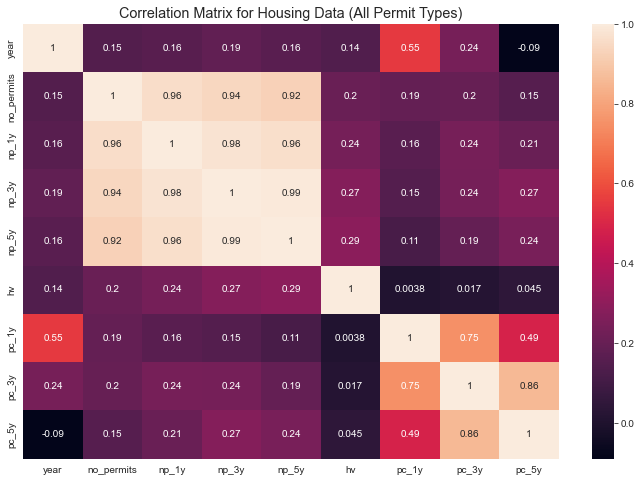

In [20]:
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr(), annot = True)
plt.title("Correlation Matrix for Housing Data (All Permit Types)")
plt.show()

Above is the full heatmap, but we're mostly just interested in the relationship between the `no_permits` and `np_*` columns VS the `hv` and `pc_*` columns

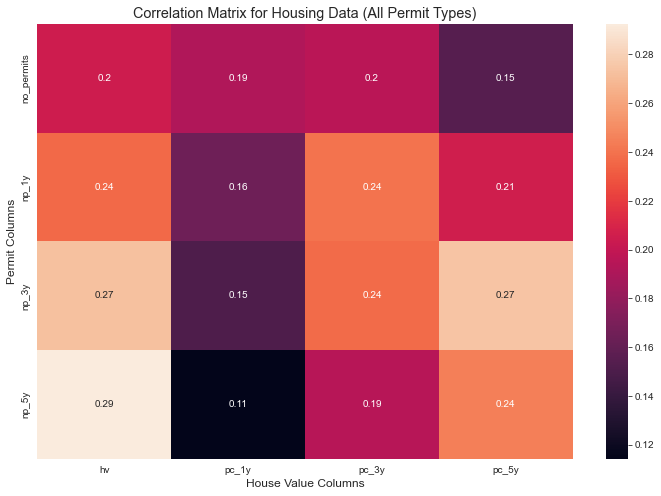

In [21]:
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr().iloc[1:5, 5:], annot = True)
plt.title("Correlation Matrix for Housing Data (All Permit Types)")
plt.xlabel("House Value Columns")
plt.ylabel("Permit Columns")
plt.show()

We're going to now loop through each of the unique values in the `permitdescription` column and compute the correlation between the Permit Columns and the House Value Columns, as we did above.  Instead of producing a heatmap for each of the 25 values, we'll list the pairs with the max correlation coefficient.

We'll do two loops:
1. The first will look at the correlation between the Permit Columns and the `hv` House Value column
2. The second will look at the correlation between the Permit Columns and the `pc_*` Percent Change columns

The reason for the two loops is that the permit types that may have a higher correlation with the house value over the years may not have as high of a correlation with percent change, and vice versa.  Sussing those specific permit types out will be the goal of the below loops.

### Property Values
We'll start with the first loop:

In [22]:
for permit_type in permit_type_list:
    permit_data = created_combined_df(permits_combined, [permit_type])
    
    # 5 is the 'hv' column, 1:5 are the permit columns.
    correlation_mat = permit_data.corr().iloc[5, 1:5].round(2)
    sorted_pairs = correlation_mat.sort_values(kind="quicksort", ascending = False)
    print(permit_type)
#     print("Number of Permits: ", permit_data['no_permits'].sum())
    print(sorted_pairs[:1])
    print('-----')

FAST FORM BUILDING PERMIT
np_3y    0.24
Name: hv, dtype: float64
-----
ADMINISTRATIVE PERMIT
np_5y    0.48
Name: hv, dtype: float64
-----
USE PERMIT
np_1y   -0.14
Name: hv, dtype: float64
-----
PLUMBING PERMIT
np_5y    0.04
Name: hv, dtype: float64
-----
ELECTRICAL PERMIT
np_5y    0.33
Name: hv, dtype: float64
-----
ALTERATION PERMIT
np_5y    0.25
Name: hv, dtype: float64
-----
ZONING/USE PERMIT
np_5y    0.3
Name: hv, dtype: float64
-----
ZONING PERMIT
np_5y    0.34
Name: hv, dtype: float64
-----
OPERATIONS PERMIT
np_3y    0.21
Name: hv, dtype: float64
-----
ADDITION PERMIT
np_5y    0.39
Name: hv, dtype: float64
-----
NEW CONSTRUCTION PERMIT
np_5y    0.31
Name: hv, dtype: float64
-----
DEMOLITION PERMIT
np_5y    0.34
Name: hv, dtype: float64
-----
SUPPRESSION PERMIT
np_5y    0.48
Name: hv, dtype: float64
-----
MECHANICAL PERMIT
np_5y    0.4
Name: hv, dtype: float64
-----
SIGN PERMIT
np_3y    0.3
Name: hv, dtype: float64
-----
ZONING ADMIN REVIEW
np_5y    0.47
Name: hv, dtype: float64
-

The 'GENERAL PERMIT' permit type has a correlation coefficient of 1.00 which seems unusual, let's isolate that permit type and plot the `np_5y` vs the `hv` columns to figure out what is happening.

<AxesSubplot:xlabel='np_5y', ylabel='hv'>

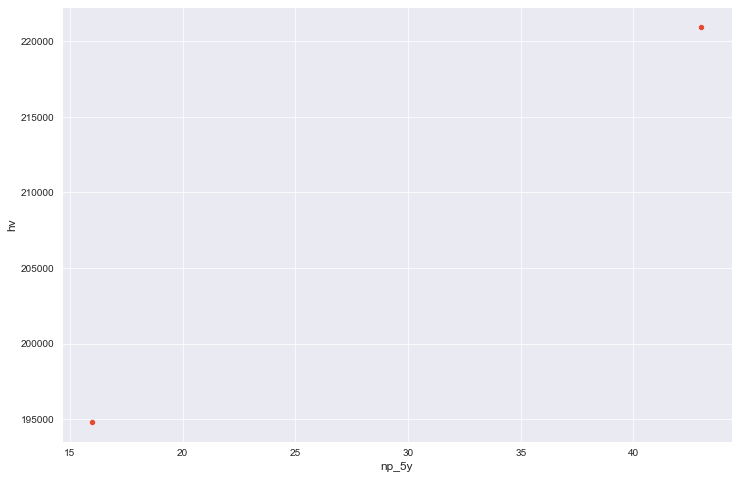

In [23]:
housing_data = created_combined_df(permits_combined, ['GENERAL PERMIT'])
sns.set_style("darkgrid")
sns.scatterplot(data=housing_data, x="np_5y", y="hv")

The 1.00 correlation coefficient is due to there only being two values, so we won't use this permit type going forward as it doesn't add much value.  Let's use permit types with a max correlation at or above 0.4 and plot the correlations on a heatmap as we did above.
 
The permit types that correlated with property values tend to be later in the construction process, such as administrative permits and zoning admin permits which are related to extending deadlines, and revising previous permits, per below:

- Administrative Permit 
    - Variety of work such as extensions or amendments/alterations of previously issued permits.  
    - This section also includes issuance of certificates of occupancy following the completion of construction.
- Suppression Permit 
    - Installation or alteration of fire sprinkler systems
- Mechanical Permit 
    - Installation of alteration of mechanical components such as ductwork, HVAC units, etc.
- Zoning Admin Permit 
    - Variety of work such as extensions or amendments/alterations of previously issued permits.
- Fire Suppression Permit 
    - Installation or alteration of fire sprinkler systems

In [24]:
permit_col_list = [
    'ADMINISTRATIVE PERMIT',
    'SUPPRESSION PERMIT',
    'MECHANICAL PERMIT',
    'ZONING ADMIN REVIEW',
    'FIRE SUPPRESSION PERMIT',
]

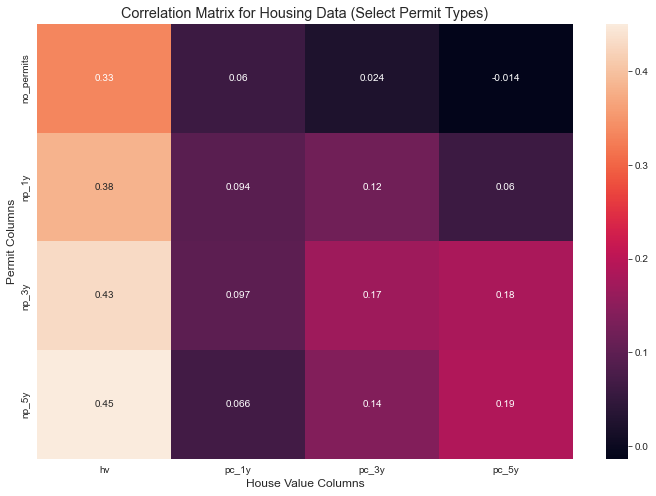

In [25]:
housing_data = created_combined_df(permits_combined, permit_col_list)
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr().iloc[1:5, 5:], annot = True)
plt.title("Correlation Matrix for Housing Data (Select Permit Types)")
plt.xlabel("House Value Columns")
plt.ylabel("Permit Columns")
plt.show()

When we used all permit types and produced a heatmap, columns `np_5y` and `hv` had a correlation coefficient of 0.29.  Now after selecting specific permit types the correlation coefficient between those columns is 0.45.  Let's plot those two columns to better understand their relationship.

[Text(0.5, 1.0, 'Number of Select Permits Issued In Past 5 Years VS House Values')]

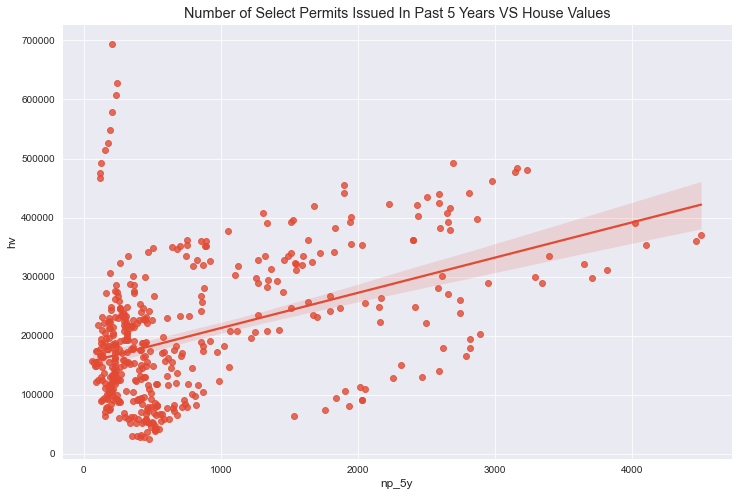

In [26]:
sns.set_style("darkgrid")
sns.regplot(data=housing_data, x="np_5y", y="hv").set(title='Number of Select Permits Issued In Past 5 Years VS House Values')

Per the graph above, it appears that there are a few outliers along the top-left section of the chart, however there seems to be a moderate positive correlation between these columns when utilizing only the selcted permit types (administrative, suppression, mechanical, fire suppression, and zoning admin review).

Given that the column with the highest correlation coefficient is the `np_5y`, and the start of permit data is 2007, there are some rows with incomplete / misleading data for the `np_5y` column.  For that reason, it's worth checking the data from years 2012-2021 in order to ensure all rows have a proper value in the `np_5y` column.  The heatmap will be reproduced with the revised date range and analyzed for any changes.

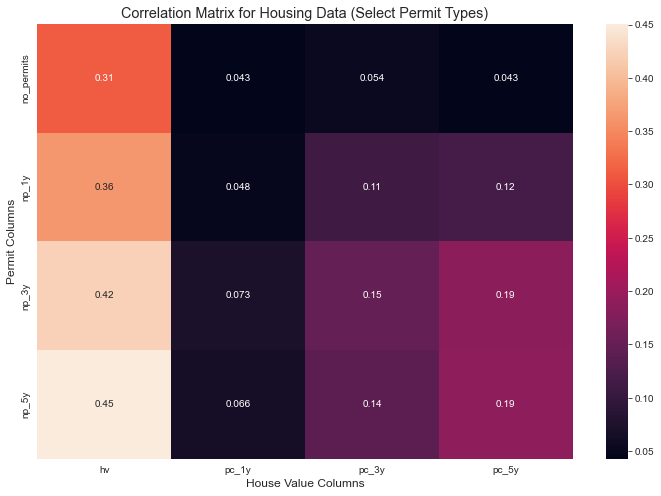

In [27]:
housing_data = created_combined_df(permits_combined, permit_col_list)
housing_data = housing_data[housing_data['year'] > 2011]
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr().iloc[1:5, 5:], annot = True)
plt.title("Correlation Matrix for Housing Data (Select Permit Types)")
plt.xlabel("House Value Columns")
plt.ylabel("Permit Columns")
plt.show()

The heatmap is similar to above, so the altered date range did not change much.

The average property price (`hv`) in a zipcode in a given year when compared to the number of the above types of permits issued in the prior 5 years (`np_5y`) had a correlation coefficient of 0.45, suggesting a moderate correlation.  Given that Administrative Permits include the issuance of certificates of occupancy, which typically indicates construction work is completed at the property, this correlation makes sense on its face.  The more  work completed in the past 5 years, the higher the property value within the zipcode.  The correlation coefficients increase along the left-hand side of the heatmap, reading from top (`no_permits`) to bottom (`np_5y`) suggesting that the permits issued within an individual year are less related to the housing value as the rolling values showing total permits issued in years prior.

### Change In Property Values

We'll now do a similar loop to find the permit types that have a higher correlation with the house value percent change (`pc_*`) columns.

In [28]:
for permit_type in permit_type_list:
    permit_data = created_combined_df(permits_combined, [permit_type])
    permit_data = permit_data[permit_data['year'] > 2011]
    
    # 6: are the 'pc_' columns, 1:5 are the permit columns.
    correlation_mat = permit_data.corr().iloc[6:, 1:5].round(2)
    sorted_pairs = correlation_mat.unstack().sort_values(kind="quicksort", ascending = False)
    print(permit_type)
    print(sorted_pairs[:3])
    print('-----')

FAST FORM BUILDING PERMIT
no_permits  pc_1y   NaN
            pc_3y   NaN
            pc_5y   NaN
dtype: float64
-----
ADMINISTRATIVE PERMIT
np_3y  pc_5y    0.11
np_1y  pc_5y    0.08
np_3y  pc_3y    0.07
dtype: float64
-----
USE PERMIT
np_1y  pc_3y    0.17
       pc_1y    0.16
       pc_5y    0.15
dtype: float64
-----
PLUMBING PERMIT
no_permits  pc_3y    0.31
            pc_5y    0.31
np_3y       pc_5y    0.31
dtype: float64
-----
ELECTRICAL PERMIT
np_3y       pc_5y    0.24
np_1y       pc_5y    0.23
no_permits  pc_3y    0.21
dtype: float64
-----
ALTERATION PERMIT
np_3y  pc_5y    0.24
       pc_3y    0.23
np_5y  pc_5y    0.23
dtype: float64
-----
ZONING/USE PERMIT
np_1y  pc_5y    0.30
np_3y  pc_5y    0.27
np_5y  pc_5y    0.24
dtype: float64
-----
ZONING PERMIT
no_permits  pc_5y    0.45
            pc_3y    0.34
np_1y       pc_5y    0.33
dtype: float64
-----
OPERATIONS PERMIT
np_3y  pc_5y    0.04
np_1y  pc_3y    0.03
np_3y  pc_3y    0.03
dtype: float64
-----
ADDITION PERMIT
np_1y  pc_5y 

Let's use permit types with a max correlation at or above 0.4 and plot the correlations on a heatmap as we did above. 

The permit types that correlated with percent change in property values tend to be earlier in the construction process such as site and utility work, zoning permits, and demolition permits or related to new construction or alterations such as the Residential Building Permit, per below:

- Zoning Permit 
    - Revisions to zoning to allow for different properties to be built or alterations to be made to an existing property. 
- Demolition Permit 
    - Demolition of interior walls of an existing property or the entire property
- Residential Building Permit
    - New construction or alterations/additions to an existing residential property.
- General Permit Minor
    - Minor work such as reroofing and removal of nonbearing walls.
- Mechanical / Fuel Gas Permit
    - Installation of alteration of mechanical components such as ductwork, HVAC units, etc.
- Site / Utility Permit
    - Site work such as foundation work for new or existing buildings, and utility connections.

In [29]:
permit_col_list = [
    "ZONING PERMIT",
    "DEMOLITION PERMIT",
    "RESIDENTIAL BUILDING PERMIT",
    "GENERAL PERMIT MINOR",
    "MECHANICAL / FUEL GAS PERMIT",
    "SITE / UTILITY PERMIT"
]

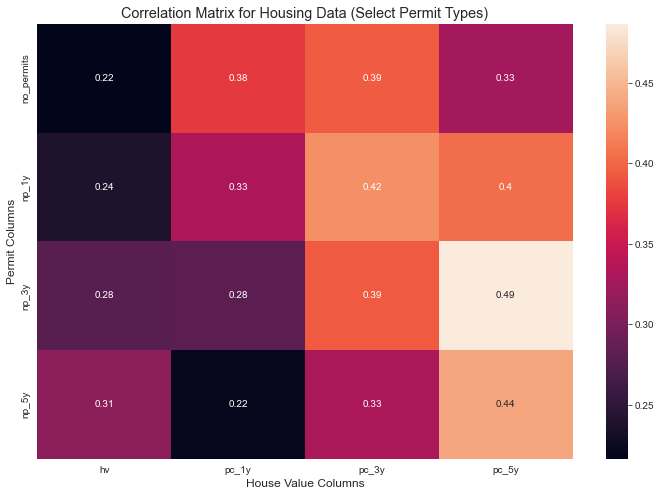

In [30]:
housing_data = created_combined_df(permits_combined, permit_col_list)
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr().iloc[1:5, 5:], annot = True)
plt.title("Correlation Matrix for Housing Data (Select Permit Types)")
plt.xlabel("House Value Columns")
plt.ylabel("Permit Columns")
plt.show()

Similar to above, let's check the heatmap when using data from 2012-2021 to ensure the `np_5y` values are accurate.

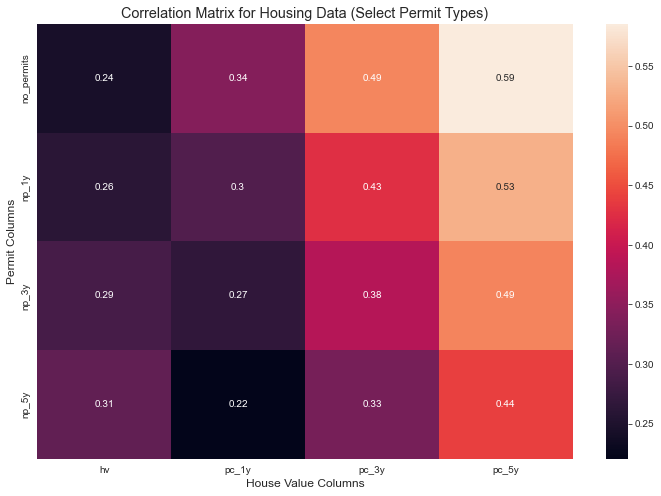

In [31]:
housing_data = created_combined_df(permits_combined, permit_col_list)
housing_data = housing_data[housing_data['year'] > 2011]
sns.set_style("darkgrid")
sns.heatmap(housing_data.corr().iloc[1:5, 5:], annot = True)
plt.title("Correlation Matrix for Housing Data (Select Permit Types)")
plt.xlabel("House Value Columns")
plt.ylabel("Permit Columns")
plt.show()

This heatmap with a revised date range shows a max correlation coefficient of 0.59 between the `no_permits` and the `pc_5y` columns.  The `pc_5y` column also has a correlation coefficient over 0.44 with all of `np_*` columns that increases from bottom to top.  

Let's plot the `no_permits` column vs the `pc_5y` column.

[Text(0.5, 1.0, 'Number of Select Permits Issued In Given Year VS 5-year Change in Property Values')]

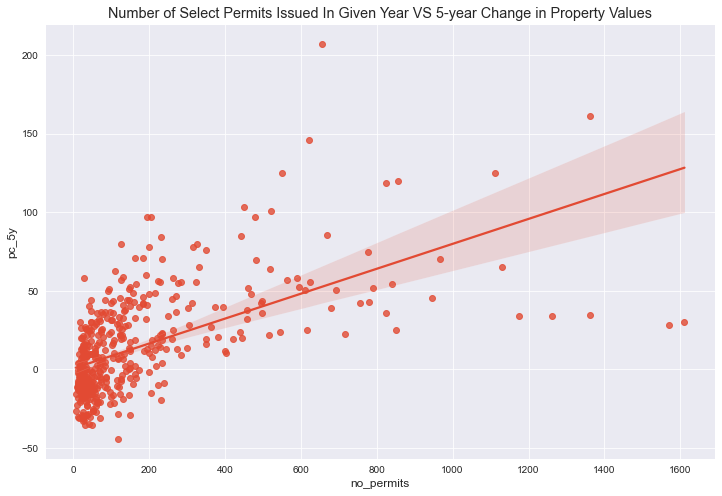

In [32]:
sns.set_style("darkgrid")
sns.regplot(data=housing_data, x="no_permits", y="pc_5y").set(title='Number of Select Permits Issued In Given Year VS 5-year Change in Property Values')

Per the graph above, there seems to be a moderate positive correlation between these columns.  

The number of the above permits issued in a given year (2012-2021) when compared to the percent change of the housing value in the prior 5 years had a correlation coefficient of 0.59 suggesting a moderate correlation.  This percent change also has a moderate correlation (0.44 - 0.53) with the total number of permits issued 1, 3, and 5 years prior.  This indicates that these permits which were related to the early stages of construction were related to the change in property values over the span of 5 years.  The more permits of the above type issued, the higher the percent change in property values within the given zipcode.

For reference the correlation between `pc_5y` and `no_permits` when all permits were used was 0.15, far lower than the 0.59 value shown above.  This suggests that while the number of all permits doesn't neccesarily change with the housing value percent change within a zip code, these specific permits (zoning, demolition, residential building, general minor, mechanical / fuel gas, and site/ utility) seem to have some correlation with those price changes.

## Conclusion

The goal of this analysis, per the Introduction, was to determine whether the number of permits issued in a given zip code within a given year is correlated to house value or changes of property values within the zip code.  The assumption going in was that building permits that better the buildings within a zip code would have some correlation with the future housing prices and change in housing prices.  This anaylsis showed that the correlation between property values vs percent change in property values depended on the types of permit used in the analysis.  

The property values within a given zipcode were moderately correlated (0.45) with permits generally issued later in the construction process, while the property value changes within a zipcode were moderately correlated (0.59) with permits issued earlier in the construction process.  This supported the general belief that work within a zipcode such a demolition work, new construction, etc., is positively correlated to the change in property values within that zipcode.

## Next Steps

To take this analysis a step further it would be worth looking at the effect of housing prices and number of permits issued at zipcodes surrounding a given zipcode, rather than limiting to just within a zipcode.  It would also be worth seeing if this correlation is similar in other cities that have permit data available.  Lastly, going into depth as to what work the permits were specifically related to may be helpful as finding furhter correlations.  Though there were 25 different permit types, they were large umbrellas, digging further into the data within the permit datasets may help shed light on other correlations.  This wasn't done initially in order to keep this analysis more top-level given the limitations stated in the introduction, but may be worth doing in the future.

Finally, it will be helpful to revisit this analysis once more years haver passed and more permit data is available to see if the relationships noted above still hold up or if they change.